# DSC 530 Final Project - Is it more likely to have severe car accident during the night than during the day?

As I was reading about the latest version of Tesla FSD and it was talking how the FSD utilizes the end-to-end neural network to achieve the autonomous driving capability, the article mentions that according to the testing of Tesla reviewers on Youtube, they noticed the system is more confident during the night drive than previous generations. That triggers a question to me: Is it more likely to have severe car accident during the night than during the day? The reason for me to come up with this question is because I personally feel the visibility is reduced during the night, therefore increasing the probability of getting into a severe car accident than during the day, given the same speed at the same road since there could be factors such as human reponse will be slower. After effort on searching for related data, I found the data I'm interested on **[Kaggle.com](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)** that provides US car accident data covering 49 states of the USA from February 2016 to March 2023.

## Step 1: Load the Dataset and Some Initial Review

In [4]:
import numpy as np
import pandas as pd

file_path = "C:/Users/P3138554/OneDrive - Charter Communications/Documents/Data Science/Bellevue/DSC 530/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

print('Dimensions of the dataset: ', df.shape)

Dimensions of the dataset:  (7728394, 46)


Check some sample data.

In [6]:
from IPython.display import display
pd.options.display.max_columns = None
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


It looks like quite a lot of the columns are in boolean data type. Let's check the data type of each column.

In [8]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

We can see that some of the fields that should be in timestamp but are in object types. Let's convert the fields to timestamps.
One thing I do notice is when I try to convert the time fields to datetime, the formats are not uniform for all observations, when some of the rows are in the format like `2017-07-23 04:21:01.000000000` where most of the rows are in format like `2017-07-23 04:21:01`. Let's take care of the discrepancy here as well.

Remove the fractional seconds in the end for some of the rows and convert the fields related to timetamp to datetime.

In [11]:
def preprocess_time_column(df, column_name):
    df[column_name] = df[column_name].str.split('.').str[0]
    df[column_name] = pd.to_datetime(df[column_name])
    return df

time_columns = ['Start_Time','End_Time', 'Weather_Timestamp']
for col in time_columns:
    df = preprocess_time_column(df, col)

Let's check some of the timestamp fields after converting.

In [13]:
df[['Start_Time','End_Time', 'Weather_Timestamp']].sample(5)

,Start_Time,End_Time,Weather_Timestamp
3922836,2022-12-22 10:50:00,2022-12-22 11:11:30,2022-12-22 10:53:00
918496,2021-08-23 06:20:29,2021-08-23 07:36:40,2021-08-23 05:53:00
6466938,2021-02-03 22:42:10,2021-02-04 01:24:08,2021-02-03 22:35:00
3001631,2018-02-14 08:57:33,2018-02-14 09:27:20,2018-02-14 08:52:00
6278069,2021-10-30 17:16:00,2021-10-30 19:19:04,2021-10-30 16:53:00


Since we are analyzing the effect of day/night on car accidents, we want to control for the locaiton approximaty as well because a different location from a different city, state could have other factors that contribute to the car accidents, such as under construction, gang area, etc.
<br>
<br>
Let's take a look at the location distribution of the data.

In [15]:
def rank_location(df, top=10):
    total = len(df)
    grouped_df = df.groupby(['City','County','State']).size().reset_index(name='frequency')
    grouped_df['percentage'] = (grouped_df['frequency'] / total) * 100
    grouped_df.sort_values(by='frequency', ascending=False, inplace=True)
    top = grouped_df.head(top)
    top = top.reset_index(drop=True)

    print(top)

rank_location(df)

          City            County State  frequency  percentage
0        Miami        Miami-Dade    FL     186760    2.416543
1      Houston            Harris    TX     168826    2.184490
2  Los Angeles       Los Angeles    CA     156491    2.024884
3    Charlotte       Mecklenburg    NC     138325    1.789829
4       Dallas            Dallas    TX     128115    1.657718
5      Orlando            Orange    FL     109687    1.419273
6       Austin            Travis    TX      93402    1.208556
7      Raleigh              Wake    NC      86043    1.113336
8    Nashville          Davidson    TN      72666    0.940247
9  Baton Rouge  East Baton Rouge    LA      71587    0.926286


As we can see, Miami has the most significant volume of data in the dataframe. Therefore, let's focus on the Miami car accident data for the purpose of this project, as well as the reduction in data run time.

In [17]:
df_miami = df.loc[(df.City=='Miami')&(df.County=='Miami-Dade')&(df.State=='FL')]
df_miami.shape

(186760, 46)

For the purpose of the project, there are a few columns that we don't need for EDA analysis:
* End Latitude and End Longitude, since most of them are Null and we already have the beginning latitude and longitude. And honestly we don't expect the location to change by much after the accident has happened unless there's no gravity.
* ID, since each row is unique according to the info on the Kaggle page.
* Source, as source of the incident recording is not important and the Source 1 and Source 2 are balenced in numbers with other sources only representing 1% according to the Kaggle detail page.
* Description, as it's a useless field that's in the format of 'Accidents on \<road name\>. Expect delays'.
* Street, City, County, State, Zipcode, Country as we already have the coordinates data and we know the accidents all happened in the US, and we are focusing on the data related to Miami,FL.
* Airport_Code which denotes an airport-based weather station which is the closest one to location of the accident.
* Timezone as the time are in local time and the local time are more closely related to the darkness. And since we are focusing on the Miami, FL accidents, the timezone is the same across all records as it's local time.
  
Let's get rid of these fields, as well as converting the boolean fields to binary int 0 and 1.

In [19]:
df_miami = df_miami.drop(columns = ['End_Lat','End_Lng','ID','Source','Description','Street','City','County','State','Zipcode','Country','Timezone',
                                    'Airport_Code'])
bool_cols = df_miami.select_dtypes('bool').columns
df_miami[bool_cols] = df_miami[bool_cols].astype(int)

df_miami.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
116057,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,0.01,2016-11-30 16:53:00,80.1,NaN,71.0,29.96,10.0,SE,9.2,NaN,Mostly Cloudy,0,0,1,0,0,0,0,0,0,1,0,1,0,Day,Day,Day,Day
116060,2,2016-11-30 15:16:19,2016-11-30 17:01:03,25.963093,-80.185677,0.01,2016-11-30 14:53:00,82.0,NaN,62.0,29.95,10.0,SE,11.5,NaN,Scattered Clouds,0,0,0,0,0,0,0,0,0,0,0,1,0,Day,Day,Day,Day
116061,2,2016-11-30 16:55:31,2016-11-30 17:25:11,25.841373,-80.322037,0.01,2016-11-30 16:53:00,78.1,NaN,76.0,29.97,10.0,SE,13.8,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day
116062,3,2016-11-30 16:57:23,2016-11-30 17:27:10,25.812199,-80.205856,0.01,2016-11-30 16:53:00,78.1,NaN,76.0,29.97,10.0,SE,13.8,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day
116064,2,2016-11-30 17:15:52,2016-11-30 17:45:36,25.781235,-80.337181,0.01,2016-11-30 16:53:00,78.1,NaN,76.0,29.97,10.0,SE,13.8,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day


There are four daylight stages fields in the dataframe: Sunrise/Sunset, Civil twilight, Nautical twilight, Astronomical twilight. According to **[WKBW.com](https://www.wkbw.com/weather/from-dawn-to-dusk-do-you-know-the-stages-of-daylight#:~:text=Civil%20Twilight%20is%20when%20the,18%20degrees%20below%20the%20horizon.)**, Civil twilight starts when the sun is 6 degrees below the horizon and lasts through sunrise for dawn - or sunset to 6 degrees below the horizon for dusk. Nautical twilight is when the sun is 6-12 degrees below the horizon, whereas the astronomial twilight is when the sun is 12-18 degrees below the horizon. Since during civil twilight and and nautical twlight we can still see things clearly, I choose to use the Astronomical twilight to distinguish physical dark and clear sights for the purpose of the project. <img src="https://www.weather.gov/images/lmk/twilight_types.png" style="height:300px" />

Drop the Sunrise_Sunset, Civil_Twilight and Nautical_Twilight fields.

In [22]:
df_miami = df_miami.drop(columns = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight'])

Drop the rows where the Astronomical_Twilight fields are null. It's okay to do so because there are only 23,246 such cases accoridng to the Kaggle data detail and it accoounts for less than 0.5% of the total records, and shouldn't impact the Miami, FL by much as well if we check.

In [24]:
df_miami = df_miami.dropna(subset=['Astronomical_Twilight'])
print('Percentage of the original Miami,FL records after removing records where Astronomical_Twilight field is null:',(df_miami.shape[0] / 186760) * 100)

Percentage of the original Miami,FL records after removing records where Astronomical_Twilight field is null: 100.0


As we can see, there's no data loss at all.

Let's check the distribution of the dat and night accidents in Miami,FL.

In [27]:
df_miami.Astronomical_Twilight.value_counts()

Astronomical_Twilight
Day      160780
Night     25980
Name: count, dtype: int64

Although the distribution is not balanced, it does not indicate it's more likely to have car accident during the day than the night, as there could be other factors such as fewer cars on the street at night as people tend to be at home or indoor more often than during the day when a lot of people drive to work. We can use weight to balance the data at later analysis.

## Step 2: Variable Analysis

To help answer the question of the project: `Is it more likely to have car accident during the night than during the day?`, we need to focus on varibales that are related to the question.

Among all of the remaining 30 variables, they are more or less helpful for our research topic, but let's choose the following five varibales for simplicity:
* Severity: It's the severity of the accident, with a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* Temperature(F): Shows the temperature (in Fahrenheit).
* Humidity(%): Shows the humidity (in percentage).
* Visibility(mi): Shows visibility (in miles).
* Distance(mi): Shows the length of the road extent affected by the accident in miles.
* Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

Some of the reasons to ignore some of the remaining fields are:
* Not including the coordinates as they are not related to the research topic and we have narrowed the data down to Miami, FL to control for location.
* Althouth wind speed and wind direction could be helpful, but since there's no information on whether the car was following the wind or against it, it's hard to clearly understand the effect.
* Not including the fields of boolean types because they are highly imbalanced with almost all fields having `False` value.

Let's check the null value counts of each of the field before we do EDA.

In [32]:
fields = ['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Distance(mi)','Astronomical_Twilight']

print(df_miami[fields].isnull().mean() * 100)

Severity                 0.000000
Temperature(F)           1.180660
Humidity(%)              1.279182
Visibility(mi)           0.954166
Distance(mi)             0.000000
Astronomical_Twilight    0.000000
dtype: float64


Since the null value acounts do not account for material percentage point for each of the field, we are good to move on with our analysis.

### Histogram

First, let's use the thinkstats modules for the purpose of analysis and visualizations.

In [36]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [37]:
import thinkstats2
import thinkplot

**Drawing the histogram of the Severity.**

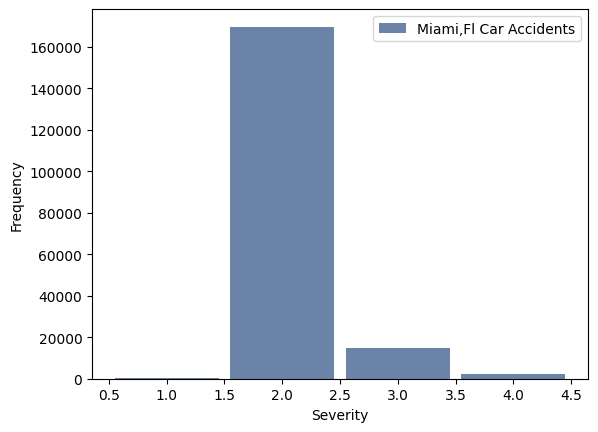

In [39]:
hist_severity = thinkstats2.Hist(df_miami.Severity, label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_severity)
thinkplot.Config(xlabel='Severity', ylabel='Frequency')

As we can see, most of the accidents are graded around severity level 2. There are much fewer accidents that are graded as level 1 or 4. It makes sense to have such outliers as severe car accidents are rare in real life, and most car accident result in the delay of the traffic. We should keep them.

**Drawing the histogram of the Temperature(F).**

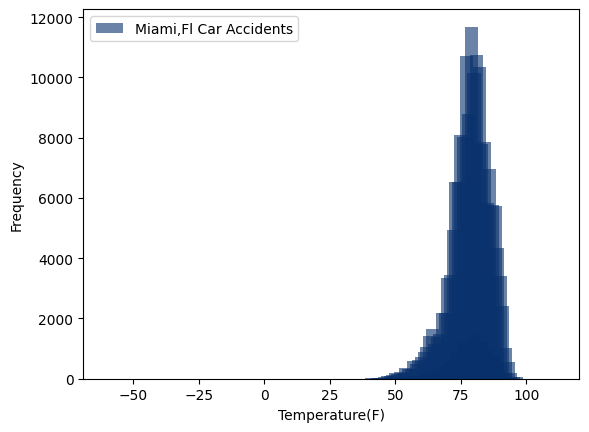

In [42]:
hist_temperature = thinkstats2.Hist(df_miami['Temperature(F)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_temperature, width=5)
thinkplot.Config(xlabel='Temperature(F)', ylabel='Frequency')

The obvious outliers are the records when the Fahrenheit temperature are negative, with a few as extreme as around -50. As they are very rare in the data, we can remove them regardless of the cause of them being outliers.

Current number of records: 184552


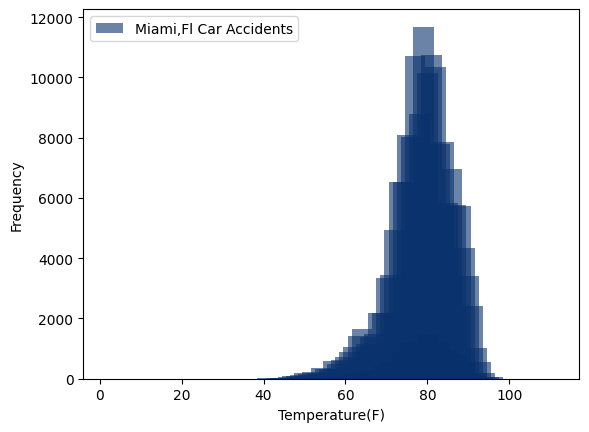

In [44]:
df_miami = df_miami[df_miami['Temperature(F)'] >= 0]
print('Current number of records:', df_miami.shape[0])
hist_temperature = thinkstats2.Hist(df_miami['Temperature(F)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_temperature, width=5)
thinkplot.Config(xlabel='Temperature(F)', ylabel='Frequency')

Now the temperature distribution looks more normal but is still skewed to the left, which makes sense as Miami can get chill but relatively rare compared to being about 80 F.

**Drawing the histogram of Humidity(%).**

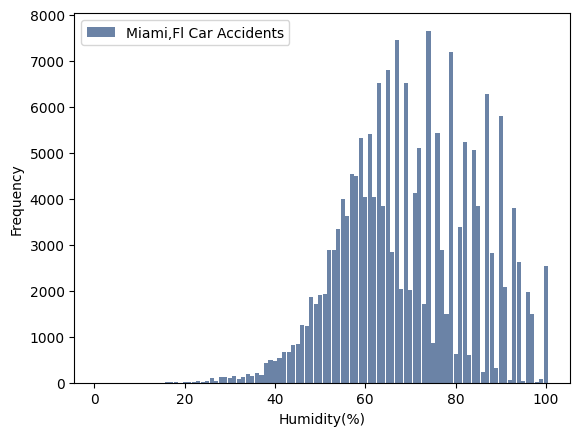

In [47]:
hist_humidity = thinkstats2.Hist(df_miami['Humidity(%)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_humidity)
thinkplot.Config(xlabel='Humidity(%)', ylabel='Frequency')

The plot looks normal if we were to take out the spikes that we see about 60% to 100%, with the data normal around 60%. However, because of the spikes, the data is not normal. There are records with humidity less than 40%, which does not make sense according to [World Population Review](https://worldpopulationreview.com/state-rankings/least-humid-states), that shows even the driest place in the US, Nevada, has an average humidity of 38.3%, let alone Florida is at the [humid subtropical climate zone](https://climatecenter.fsu.edu/images/fcc/climateofflorida.pdf). 

Let's check the number of records with humidity less than 30%.

In [50]:
print('Number of records:', len(df_miami[df_miami['Humidity(%)'] < 30]), 'Percenatege:', len(df_miami[df_miami['Humidity(%)'] < 30])/ len(df_miami) 
      * 100)

Number of records: 573 Percenatege: 0.3104815986822142


Since there about about 0.31 percent of all current Miami records have humidity less than 30%, let's remove them for data sanity.

Current number of records: 183798


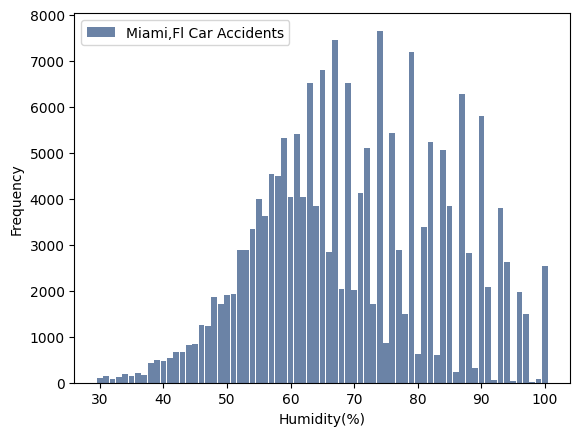

In [52]:
df_miami = df_miami[df_miami['Humidity(%)'] >= 30]
print('Current number of records:', df_miami.shape[0])
hist_humidity = thinkstats2.Hist(df_miami['Humidity(%)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_humidity)
thinkplot.Config(xlabel='Humidity(%)', ylabel='Frequency')

**Drawing the histogram of Visibility(mi).**

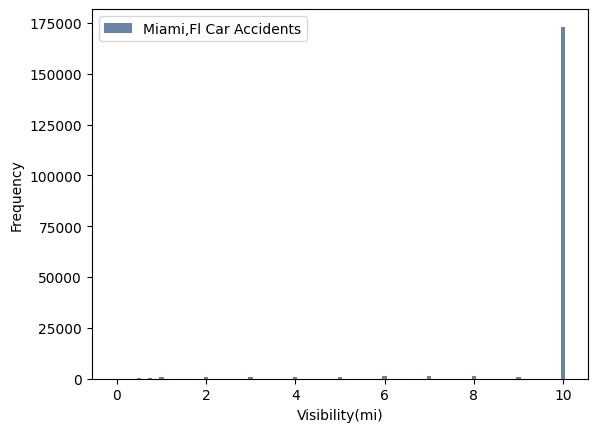

In [54]:
hist_visibility = thinkstats2.Hist(df_miami['Visibility(mi)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_visibility, width = 0.1)
thinkplot.Config(xlabel='Visibility(mi)', ylabel='Frequency')

We can see the visibility has a majority value of 10 miles. Since we don't have insights into the cause of the outliers, and the lower valued outliers could well mean abnormal situations such as tropical storm, we will keep the values untouched.

**Drawing the histogram of Distance(mi).**

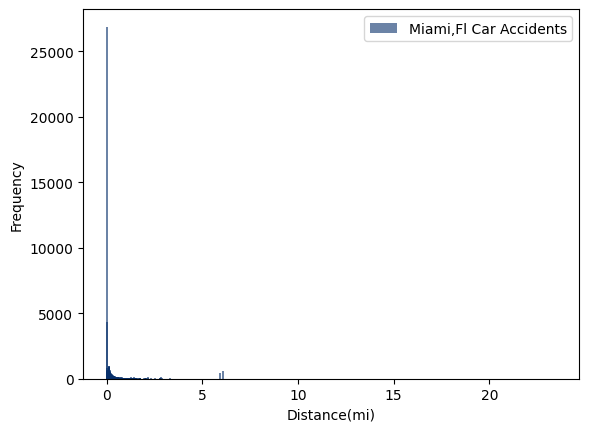

In [57]:
hist_distance = thinkstats2.Hist(df_miami['Distance(mi)'], label='Miami,Fl Car Accidents')
thinkplot.Hist(hist_distance, width=0.1)
thinkplot.Config(xlabel='Distance(mi)', ylabel='Frequency')

There are a more than 25000 records have distance of 0 miles, meaning not affecting the road at all. Since it's really hard to visualize the outliers of this variable, let's use max and min to get the exact largest and smalled distance values.

In [59]:
max(df_miami['Distance(mi)']), min(df_miami['Distance(mi)'])

(23.466, 0.0)

Since we don't have insights into the cause of the outliers, and 23 miles of road affect could be completely blocking the road, or part of the road, as some roads are way longer than 23 miles, such as [U.S.Route 20](https://en.wikipedia.org/wiki/U.S._Route_20), which extends to 3,365 miles, I will leave the outliers untouched.

### Descriptive Characteristics

Let's split the data into night and day for the purpose of the project.

In [63]:
night = df_miami[df_miami.Astronomical_Twilight == 'Night']
day = df_miami[df_miami.Astronomical_Twilight == 'Day']

night.shape, day.shape

((25411, 30), (158387, 30))

Let's get the descriptive characteristics of the variables: Mean, Mode, Spread, and Tails.

In [65]:
def desccr(df, variable, percentile=0.025):
    mean = df[variable].mean()
    mode = df[variable].mode()[0]
    spread = df[variable].var()

    lower_bound = df[variable].quantile(percentile)
    upper_bound = df[variable].quantile(1 - percentile)

    lower_tail = df[df[variable] <= lower_bound][variable]
    upper_tail = df[df[variable] >= upper_bound][variable]

    lower_tail_range = (lower_tail.min(), lower_tail.max())
    upper_tail_range = (upper_tail.min(), upper_tail.max())
    
    print(f'Variable: {variable}\nMean: {mean}\nMode: {mode}\nSpread: {spread}\nLower Tail Range: {lower_tail_range}\nUpper Tail Range: {upper_tail_range}')

The descriptive characteristics of the night accidents in Miami, FL.

In [67]:
variables = ['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Distance(mi)']
for i in variables:
    desccr(night, i)
    print('*'*15)

Variable: Severity
Mean: 2.1297076069418757
Mode: 2
Spread: 0.16397023721035814
Lower Tail Range: (1, 2)
Upper Tail Range: (3, 4)
***************
Variable: Temperature(F)
Mean: 72.59369170831529
Mode: 75.0
Spread: 55.46061781900353
Lower Tail Range: (41.0, 54.0)
Upper Tail Range: (83.0, 88.0)
***************
Variable: Humidity(%)
Mean: 80.31513911298256
Mode: 87.0
Spread: 122.69824344680107
Lower Tail Range: (31.0, 56.0)
Upper Tail Range: (100.0, 100.0)
***************
Variable: Visibility(mi)
Mean: 9.703179426310584
Mode: 10.0
Spread: 1.6684550961979439
Lower Tail Range: (0.06, 5.0)
Upper Tail Range: (10.0, 10.0)
***************
Variable: Distance(mi)
Mean: 0.40081834640734937
Mode: 0.0
Spread: 0.8916221194603018
Lower Tail Range: (0.0, 0.0)
Upper Tail Range: (2.959, 13.1)
***************


The descriptive characteristics of the day accidents in Miami, FL.

In [69]:
for i in variables:
    desccr(day, i)
    print('*'*15)

Variable: Severity
Mean: 2.0959800993768427
Mode: 2
Spread: 0.10759101517393688
Lower Tail Range: (1, 2)
Upper Tail Range: (3, 4)
***************
Variable: Temperature(F)
Mean: 79.45278779192736
Mode: 79.0
Spread: 50.58256952351726
Lower Tail Range: (4.0, 62.0)
Upper Tail Range: (91.0, 109.0)
***************
Variable: Humidity(%)
Mean: 68.23428690485962
Mode: 67.0
Spread: 193.127132963367
Lower Tail Range: (30.0, 43.0)
Upper Tail Range: (96.0, 100.0)
***************
Variable: Visibility(mi)
Mean: 9.72932329066994
Mode: 10.0
Spread: 1.6786903745454937
Lower Tail Range: (0.0, 5.0)
Upper Tail Range: (10.0, 10.0)
***************
Variable: Distance(mi)
Mean: 0.3986807124855947
Mode: 0.0
Spread: 0.8575694350611041
Lower Tail Range: (0.0, 0.0)
Upper Tail Range: (2.929, 23.466)
***************


Cohen effect size of the Severity between night and day

In [71]:
thinkstats2.CohenEffectSize(night.Severity, day.Severity)

0.09929061560614377

Cohen effect size of the Distance(mi) between night and day

In [73]:
thinkstats2.CohenEffectSize(night['Distance(mi)'], day['Distance(mi)'])

0.0023020239266414123

The effect size is much clear on Severity than the Distance(mi).

Based on the characteristics above, the mean severity and the affect distance are larger in the night than the day, even though the day has much larger max value of the affect distance. Based on this initial information, it does look like our hypothesis is correct. Let's move on to more advanced analysis.

### PMF Analysis

Let's draw the PMF graphs for the day and night.

First, let's focus on the Severity.

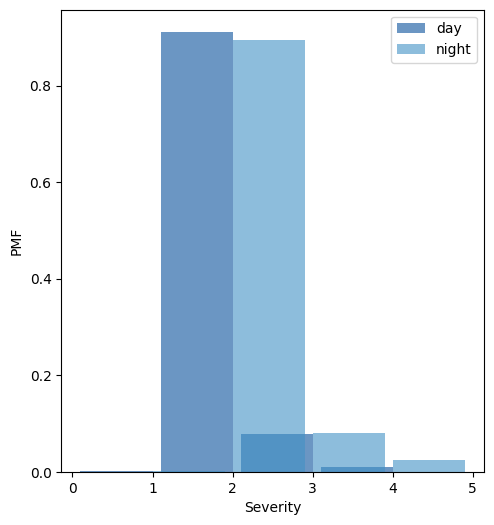

In [79]:
day_pmf_severity = thinkstats2.Pmf(day.Severity, label='day')
night_pmf_severity = thinkstats2.Pmf(night.Severity, label='night')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(day_pmf_severity, align="right")
thinkplot.Hist(night_pmf_severity, align="left")
thinkplot.Config(xlabel="Severity", ylabel="PMF")

According to the graph, night accidents seem to be less likely than day accidents to have severity level of 2, and more likely to have severity level of 3 and 4.

Let's take a look at Distance(mi).

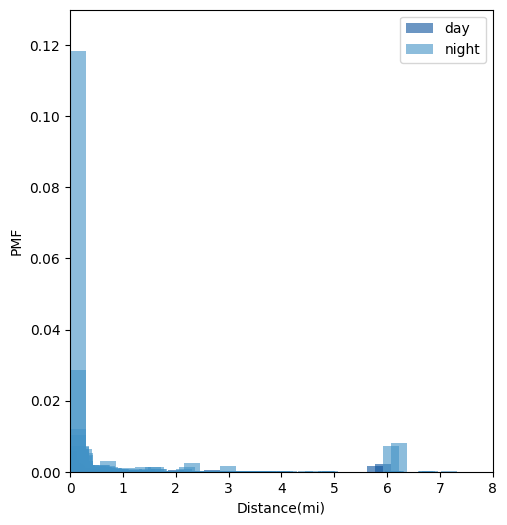

In [82]:
day_pmf_distance = thinkstats2.Pmf(day['Distance(mi)'], label='day')
night_pmf_distance = thinkstats2.Pmf(night['Distance(mi)'], label='night')

width = 0.3
axis = [0,8,0,0.13]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(day_pmf_distance, align="right", width=width)
thinkplot.Hist(night_pmf_distance, align="left", width=width)
thinkplot.Config(xlabel="Distance(mi)", ylabel="PMF", axis=axis)

Although it's hard to visualize the PMF chart of Distance(mi), we can still see that night accidents seem to be more likely to have larger distance impact.

### CDF Analysis

Let's draw the CDF graphs for the day and night.

First, let's focus on the Severity.

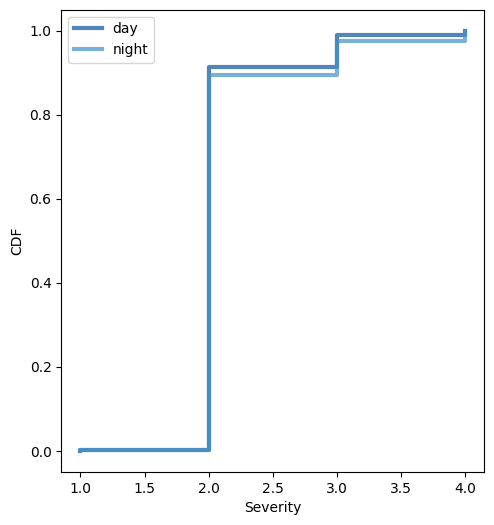

In [87]:
day_cdf_severity = thinkstats2.Cdf(day.Severity, label='day')
night_cdf_severity = thinkstats2.Cdf(night.Severity, label='night')

thinkplot.PrePlot(2, cols=2)
thinkplot.Cdfs([day_cdf_severity, night_cdf_severity])
thinkplot.Config(xlabel="Severity", ylabel="CDF")

This graph provides visual representation that the most common value for both day and night is level 2 of severity and it does look like the change of severity happens earlier for night for both severity 3 and 4, indicating accidents that happened during night tend to be more severe. 

Let's take a look at Distance(mi).

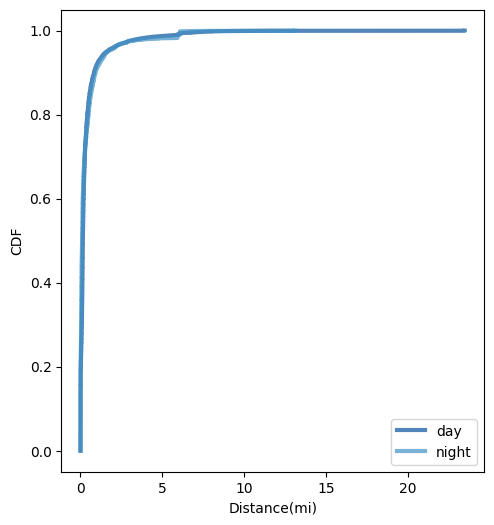

In [90]:
day_cdf_distance = thinkstats2.Cdf(day['Distance(mi)'], label='day')
night_cdf_distance = thinkstats2.Cdf(night['Distance(mi)'], label='night')

thinkplot.PrePlot(2, cols=2)
thinkplot.Cdfs([day_cdf_distance, night_cdf_distance])
thinkplot.Config(xlabel="Distance(mi)", ylabel="CDF")

The plot shows the night accidents have slightly longer impact distance especially as the CDF gets larger.

### Analytical Distribution Analysis

For this project, we have accident start time and end time. Since it's clear neither the Distance(mi) nor Severity variables are normally distributed, with the severity variable being categorical so there's no normality in it whatsoever, we will focus on the exponential distribution and take a look at the whole dataset, meaing including both the day and night. For exponential distributions, if the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

Let's order the start time in ascending order, and calculate the minutes since midnight, and the calculate the difference between consecutive accident start time for the whole dataset. Although the start time spans over multiple days, in this case we only extract the time part and calculate the time part difference.

In [95]:
def time_process(df):
    df.loc[:,'time'] = df.loc[:,'Start_Time'].dt.time
    df = df.sort_values(by = 'time').reset_index(drop=True)
    df['elapsed_since_midnight'] = df.loc[:,'Start_Time'].dt.hour*60 + df.loc[:,'Start_Time'].dt.minute + df.loc[:,'Start_Time'].dt.second/60
    df['time_diff'] = df.loc[:,'elapsed_since_midnight'].diff()

    return df

In [96]:
df_miami_time = time_process(df_miami)

Check some examples.

In [98]:
df_miami_time[['Start_Time','time','elapsed_since_midnight','time_diff']].head(5)

,Start_Time,time,elapsed_since_midnight,time_diff
0,2021-01-27,00:00:00,0.0,NaN
1,2020-11-24,00:00:00,0.0,0.0
2,2020-10-01,00:00:00,0.0,0.0
3,2020-10-16,00:00:00,0.0,0.0
4,2020-11-21,00:00:00,0.0,0.0


In [99]:
df_miami_time[['Start_Time','time','elapsed_since_midnight','time_diff']].sample(5)

,Start_Time,time,elapsed_since_midnight,time_diff
100790,2020-12-31 14:36:30,14:36:30,876.500000,0.000000
121900,2022-03-09 15:52:44,15:52:44,952.733333,0.000000
96110,2021-09-16 14:19:30,14:19:30,859.500000,0.000000
2431,2021-01-20 01:23:32,01:23:32,83.533333,0.200000
10803,2020-12-21 05:14:25,05:14:25,314.416667,0.033333


Let's plot the time diff CDF.

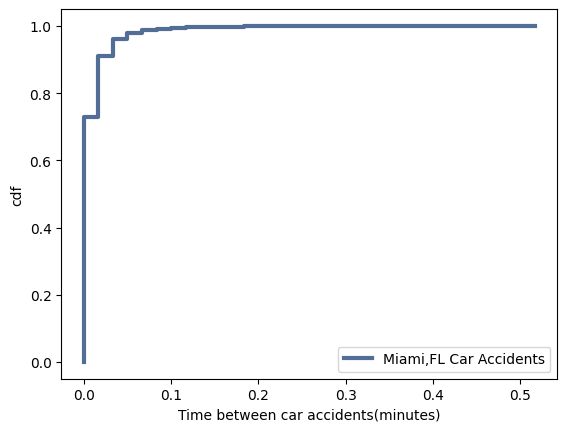

In [101]:
cdf_time = thinkstats2.Cdf(df_miami_time.time_diff, label="Miami,FL Car Accidents")
thinkplot.Cdf(cdf_time)
thinkplot.Config(xlabel="Time between car accidents(minutes)", ylabel="cdf")

This graph looks like an exponential distribution with relatively large $\lambda$. Let's get rid of the duplicated time records and try again.

In [103]:
df_miami_time_dedup = df_miami_time.drop_duplicates(subset='time')

Check the deduplicated dataframe.

In [105]:
df_miami_time_dedup[['Start_Time','time','elapsed_since_midnight','time_diff']].head(5)

,Start_Time,time,elapsed_since_midnight,time_diff
0,2021-01-27 00:00:00,00:00:00,0.000000,NaN
13,2020-12-23 00:00:01,00:00:01,0.016667,0.016667
15,2020-12-19 00:00:10,00:00:10,0.166667,0.150000
16,2020-12-27 00:00:11,00:00:11,0.183333,0.016667
17,2022-07-17 00:00:14,00:00:14,0.233333,0.050000


Now let's plot the time diff CDF again.

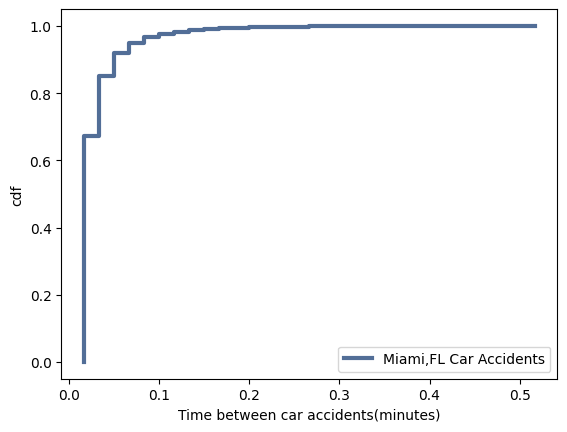

In [107]:
cdf_time = thinkstats2.Cdf(df_miami_time_dedup.time_diff, label="Miami,FL Car Accidents")
thinkplot.Cdf(cdf_time)
thinkplot.Config(xlabel="Time between car accidents(minutes)", ylabel="cdf")

Still, the graph looks like an exponential distribution with relatively large $\lambda$. Let's take a look at the complementary CDF.

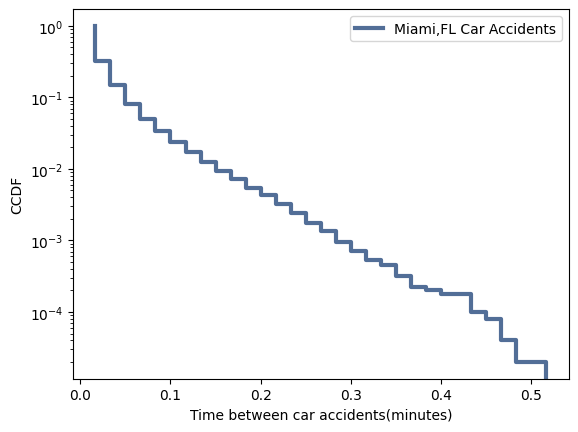

In [109]:
thinkplot.Cdf(cdf_time, complement=True)
thinkplot.Config(
    xlabel="Time between car accidents(minutes)",
    ylabel="CCDF",
    yscale="log"
)

The graph looks like a straight-line trended steps. I would say exponential distribution model will work good for time between car accidents for our database.

### Scatter Plots

For this analysis, let's take a look at the scatter plots of Temperature(F) and Wind_Speed(mph), Humidity(%) and Precipitation(in) and see if there's relationship. I will also include the saturation to the plot so the overlapping effect is reduced to show the true scatter.

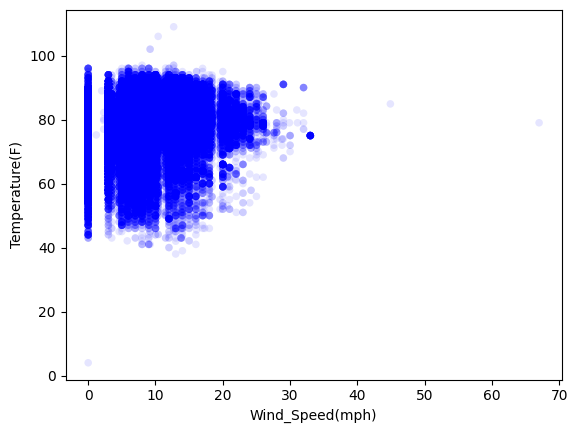

<Figure size 800x600 with 0 Axes>

In [113]:
thinkplot.Scatter(df_miami['Wind_Speed(mph)'], df_miami['Temperature(F)'], alpha = 0.1)
thinkplot.Show(xlabel = 'Wind_Speed(mph)', ylabel='Temperature(F)')

First, there's no non-linear relationship in this plot as there's no non-straight-line pattern in this graph. There's no clear indication that high wind speed tend to have low temperature for the Miami,FL car accidents data. Quite the opposite, the scatter plot shows that high wind speed tend to have higher temperature. At the low wind speed, however, there's wide spread of temperature, indicating the relationship is weak.

Since we used the whole dataset of the Miami, FL accidents, let's try the hexbin plot to make the relasionship clearer.

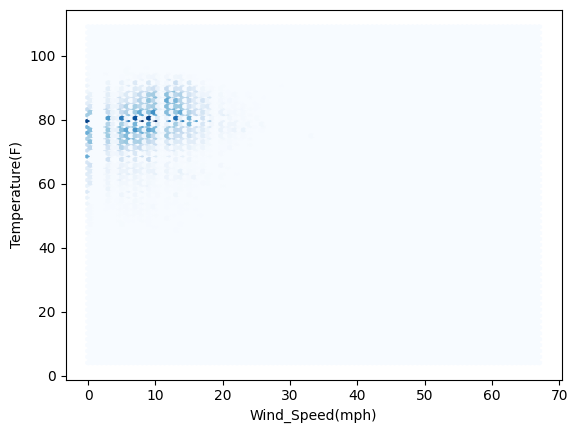

In [116]:
thinkplot.HexBin(df_miami['Wind_Speed(mph)'], df_miami['Temperature(F)'])
thinkplot.Config(xlabel = 'Wind_Speed(mph)', ylabel='Temperature(F)')

One thing we can notice from the HexBin plot is that it's clear the majority of the data is around 80 degrees, regardless of the wind speed, which makes sense as Miami,FL is around that heat year around, and the positive relationship between the higher wind speed and high temperature is less clear.

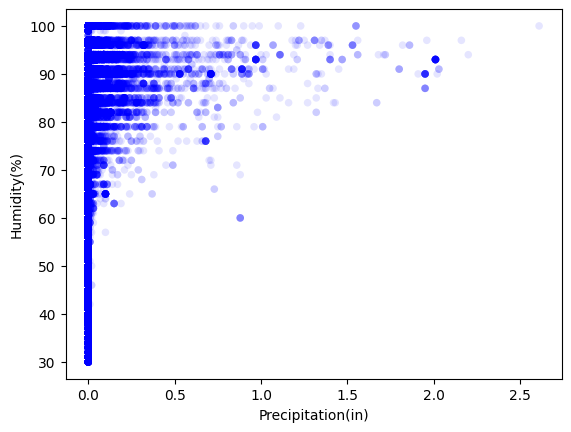

<Figure size 800x600 with 0 Axes>

In [118]:
thinkplot.Scatter(df_miami['Precipitation(in)'], df_miami['Humidity(%)'], alpha = 0.1)
thinkplot.Show(xlabel = 'Precipitation(in)', ylabel='Humidity(%)')

First, there's no non-linear relationship in this plot as there's no non-straight-line pattern in this graph. The plot above indicates there's no clear linear relationship between precipitation and humidity in the Miami, FL car accidents data. However, we can tell that as precipitation increases, humidity tends to increase for some of the outliers.

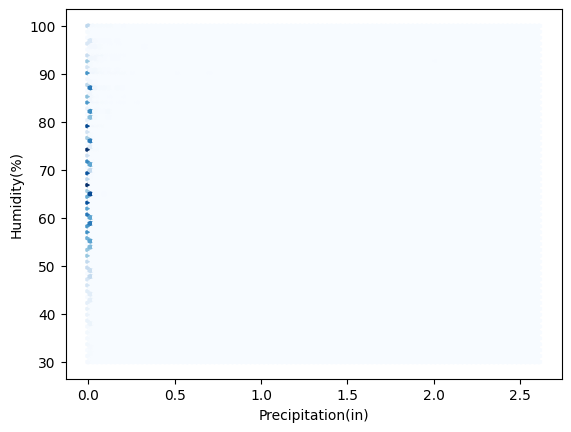

In [120]:
thinkplot.HexBin(df_miami['Precipitation(in)'], df_miami['Humidity(%)'])
thinkplot.Config(xlabel = 'Precipitation(in)', ylabel='Humidity(%)')

Drawing the HexBin plot, we can tell the humidity and precipitation have no major correlation in our Miami,FL car accidents dataset. 

Now let's take a look at the covariance. Before we do, let's get rid of the null values.

In [123]:
df_miami_cleand = df_miami.dropna(subset=['Wind_Speed(mph)','Temperature(F)','Precipitation(in)','Humidity(%)'])

print('Covariance of Wind_Speed(mph) and Temperature(F):',  thinkstats2.Cov(df_miami_cleand['Wind_Speed(mph)'], df_miami_cleand['Temperature(F)']),
      '\nCovariance of Precipitation(in) and Humidity(%):',  thinkstats2.Cov(df_miami_cleand['Precipitation(in)'], df_miami_cleand['Humidity(%)']))

Covariance of Wind_Speed(mph) and Temperature(F): 9.082829748763125 
Covariance of Precipitation(in) and Humidity(%): 0.19809595334054306


As we can see from the data, both pairs have positive covariance, meaning the two variables in each group tend to move in the same direction.

In [125]:
print('Pearson\'s correlation of Wind_Speed(mph) and Temperature(F):',  
      thinkstats2.Corr(df_miami_cleand['Wind_Speed(mph)'], df_miami_cleand['Temperature(F)']),
      '\nPearson\'s correlation of Precipitation(in) and Humidity(%):',  
      thinkstats2.Corr(df_miami_cleand['Precipitation(in)'], df_miami_cleand['Humidity(%)']))

Pearson's correlation of Wind_Speed(mph) and Temperature(F): 0.24198505037254636 
Pearson's correlation of Precipitation(in) and Humidity(%): 0.18664569152377303


Not surprising, both groups have positive correlation, but with weak strength. Since the variables are not normal and there's presence of outliers, Pearson's correlation is not robust. Let's take a look at the Spearman's rank correlation.

In [127]:
print('Spearman\'s rank correlation of Wind_Speed(mph) and Temperature(F):',  
      thinkstats2.SpearmanCorr(df_miami_cleand['Wind_Speed(mph)'], df_miami_cleand['Temperature(F)']),
      '\nSpearman\'s rank correlation of Precipitation(in) and Humidity(%):',  
      thinkstats2.SpearmanCorr(df_miami_cleand['Precipitation(in)'], df_miami_cleand['Humidity(%)']))

Spearman's rank correlation of Wind_Speed(mph) and Temperature(F): 0.2659487208079751 
Spearman's rank correlation of Precipitation(in) and Humidity(%): 0.3401587005587108


The Spearman's rank correlation of Wind_Speed(mph) and Temperature(F) increased by a little, whereas of Precipitation(in) and Humidity(%) almost doubled. although still shows weak strength.

## Step 3: Hypothesis Testing

To answer the question for hypothesis testing about 'Given the sample and an apparent effect, what is the probability of seeing such an effect by chance, let's first define the test statistic. We see 2 variables that are helpful for answering our hypothesis question: Distance(mi) or Severity. Since we have seen the average Distance(mi) and Severity both are larger during the night than during the day, however because the Severity has much larger Cohen Effect Size than the Distance(mi), we can use do hypothesis on the Severity. Although, we have to keep in mind that statistically significant does not alway mean that an effect is important, or significant in practice. Since the Severity is categorical, we use chi-squared statistic.

In [131]:
class SeverityTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        day, night = self.data
        self.n = len(day)
        self.pool = np.hstack((day, night))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = list(df_miami.Severity.unique())
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        day, night = data
        stat = self.ChiSquared(day) + self.ChiSquared(night)
        return stat

    def ChiSquared(self, severity):
        hist = thinkstats2.Hist(severity)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(severity)
        stat = sum((observed - expected)**2 / expected)
        return stat

For the null hypothesis, it will be that there is no difference between day and night car accidents severity distribution; that is, there is no significant association between the time of day (day or night) and the severity of car accidents.

In [133]:
data = day.Severity.values, night.Severity.values
ht = SeverityTest(data)
ht.PValue()

0.0

According to the p-value, the probability of seeing the apparent effect if the null hypothesis is true is super low and the effect is therefore statitically significant, which means that it is unlikely to have occured by chance. In that case we infer that the effect is more likely to appear in the larger population.

While the chi-squared test indicate a relationship between time of day and accident severity, it does not directly measure the likelihood of accident occurring at night versus during the day. Therefore, let's also do a one-sided test of the mean of the Distance(mi).

In [136]:
class DiffMeansOneSided(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        night, day = data
        test_stat = night.mean() - day.mean()
        return test_stat

    def MakeModel(self):
        night, day = self.data
        self.n, self.m = len(night), len(day)
        self.pool = np.hstack((night, day))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [137]:
data = night.Severity.values, day.Severity.values
ht = DiffMeansOneSided(data)
ht.PValue()

0.0

The p value of is still below 0.05, which confirms our hypothesis that it's more likely to have severe car accidents during the night than during the day.

## Step 4: Regression Analysis

Since we explored the Wind_Speed(mph) and Temperature(F) variables and their relationship ealier in the analysis, let's build a simple linear regression model and see the model summary.

In [141]:
import statsmodels.formula.api as smf

formula = 'Q("Temperature(F)") ~ Q("Wind_Speed(mph)")'
model = smf.ols(formula, data = df_miami_cleand)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q("Temperature(F)")   R-squared:                       0.059
Model:                             OLS   Adj. R-squared:                  0.059
Method:                  Least Squares   F-statistic:                 1.009e+04
Date:                 Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                         17:39:43   Log-Likelihood:            -5.5090e+05
No. Observations:               162158   AIC:                         1.102e+06
Df Residuals:                   162156   BIC:                         1.102e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               75.2275      0.037   2007.894      0.000      75.154      75.301
Q("Wind_Speed(mph)")     0.3581      0.004    100.429      0.000       0.351       0.365
==============================================================================
Omnibus:                    20540.061   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35943.022
Skew:                          -0.851   Prob(JB):                         0.00
Kurtosis:                       4.557   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the R squared and adjusted R squared are both 0.059, meaning a very small percentage of the variability in the Temperature(F) is explained by the Wind_Speed(mph). However, the p value of 0.000 for both the intercept and the predictor variable indicate they are statitically significant. When wind speed is 0 mph, the expected temperature is 75.2F. The p value of 0 provides evidence against the null hypothesis that the coefficient of wind speed is 0 mph. When wind speed increases or decreases by 1 mph, the temperature is expected to increase or decrease by 0.36F.